# COVID-19 Forecasting: How many cases will there be in the next 10 days?

One of the most important things we can do in the midst of a global pandemic is to understand how the virus behaves and develop accurate predictions models so we know what we are up against. This blog post will attempt to do exactly that, using official case counts from the 1st day of the coronavrius recorded to the 66th day in Timeseria to predict day 67 to 76 counts. First, a look at the graph.

In [1]:
from IPython.display import Image

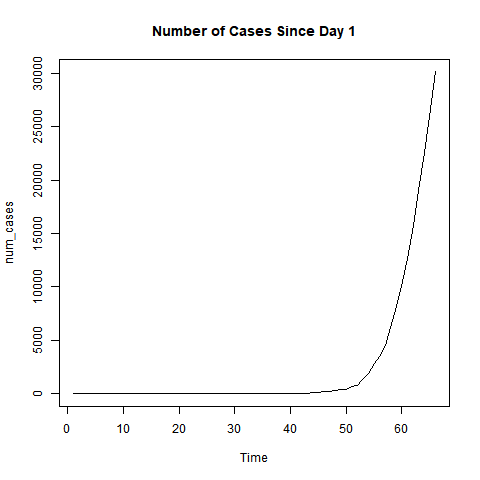

In [2]:
Image("original.png")

Here, we see a scary exponential trend, meaning we are past the containment phase and into the damage control phase. From there, we need to do put each day on a "level playing field"; right now, up until about day 40, the count is close to 0, and then it skyrockets. Simply due to the exponential increase, the variance on day 10's observations is much less than that of, say, day 60. For this reason we will take the log of the data to stabilize the variance, and the continue our modeling.

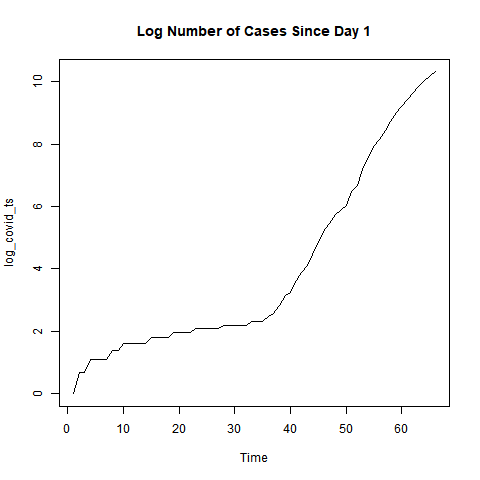

In [5]:
Image("logged.png")

Now our variance is more stabilized than it was day to day. In this graph we notice two strong linear trends, seperated around day 35 in the data. For predictions's purposes, we make the assumption that the first half of the data where it takes 30 days to get to 10 cases will not help us very much in terms of forecasting. What we are more interested in is the trend that the data shows from about day 35 onward; this seems to be the true spread of the virus (once we started testing more). 

When we model time series, our goal is to find stationarity within the data. Stationarity essentially means that we have a constant mean across the data and that there is no discernible trend (it does not travel up or down for large segements of time). We transform our data in order to find stationarity, and that will help us determine what parameters to use for modeling.

The linear trend like the one we have above (in the second half of the data) is certainly non-stationary behavior. To get rid of linear trend, we can employ a technique called first-differencing, which plots the successive differences of the time series. 

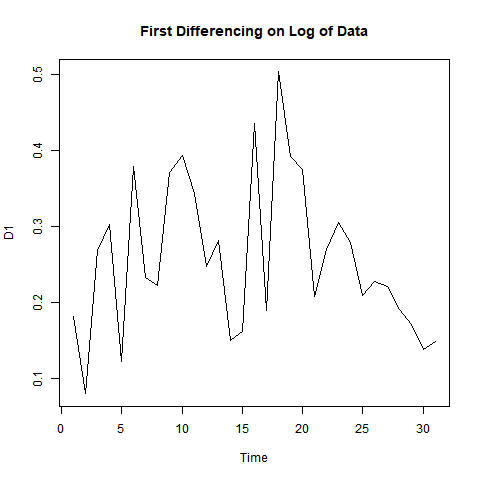

In [7]:
Image("D1_half.png")

Now we are looking stationary! There are statistical techniques to prove this, but this data (although a small sample sizes) looks to be random, or what we call white noise in statistics. Something like this is exactly what you are looking for when trying to transform a nonstationary time series to be stationary. What this means is after having approximated the linear trend that we took out previously, we can model the rest as essentially random. The only thing we have to take into account is that the differences are not zero-mean (the mean looks to be around 0.25). This means we have to include a drift term in the model to make sure that we model accurately. We would call this an ARIMA (0, 1, 0) model with drift. The parameter 1 indicated that we differenced one time on the data, while the two paramters 0 are for what is called the autoregressive model and the moving average model (respectively). These are not required here because our differences resembled white noise. Usually, the differences do not exactly resemeble white noise and we use what is called ACF plots to determine the order of an appropriate auto-regressive or moving average model.

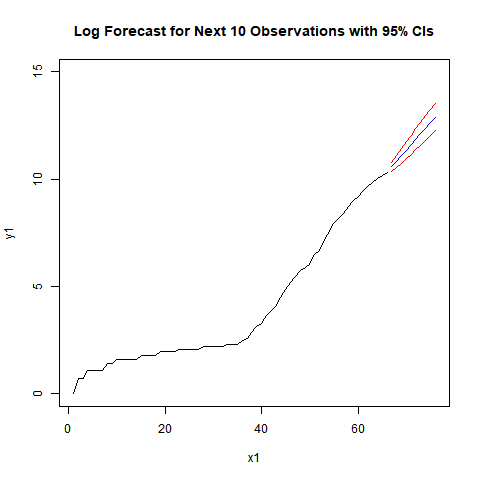

In [8]:
Image("log.png")

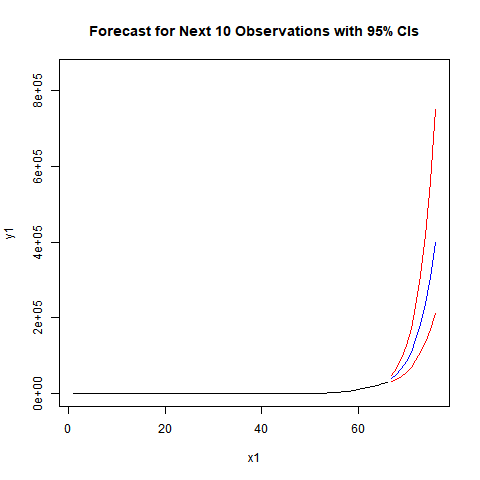

In [9]:
Image("orig.png")

The blue line is the center of what we expect, while the red lines represent 95% confidence intervals (we are 95% sure that the real values will fall in those lines. 

In [12]:
import pandas as pd

In [17]:
d = {'Day':range(67, 77, 1), 'Predicted Cases': [38996, 50494, 65382, 84659, 109621, 141943,183794, 237986, 308156, 399016]}
pd.DataFrame(data = d)

,Day,Predicted Cases
0,67,38996
1,68,50494
2,69,65382
3,70,84659
4,71,109621
5,72,141943
6,73,183794
7,74,237986
8,75,308156
9,76,399016


The predictions are grim. Keep in mind that these predictions are based solely on the data, which means that they do not take into account factors such as limited testing capacity or effective implementation of social distancing measures. Even if official case counts lag behind these predictions, without effort from the whole world to slow the spread, we can be almost sure that the virus is actually spreading as fast as these predictions suggest. 